In [18]:
import spatialdata 
import sopa
import spatialdata_plot

In [2]:
sdata_full = sopa.io.xenium(path='/media/mathieubo/SSD3/Xenium/20250806__132341__MATHIEU_run_1_060825/output-XETG00443__0065161__P1212__20250806__132352/')

/home/mathieubo/miniforge3/envs/sopa/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [3]:
sdata_full

SpatialData object
├── Images
│     └── 'morphology_focus': DataTree[cyx] (4, 54731, 51373), (4, 27365, 25686), (4, 13682, 12843), (4, 6841, 6421), (4, 3420, 3210)
└── Points
      └── 'transcripts': DataFrame with shape: (<Delayed>, 13) (3D points)
with coordinate systems:
    ▸ 'global', with elements:
        morphology_focus (Images), transcripts (Points)

In [4]:
# Save object
#sdata.write(file_path='/media/mathieubo/SSD3//media/mathieubo/SSD3/Xenium/P1212.zarr')

/home/mathieubo/miniforge3/envs/sopa/lib/python3.10/site-packages/tifffile/tifffile.py:8797: UserWarning: <tifffile.TiffPage 0 @16> reading array from closed file
  warnings.warn(


INFO     The SpatialData object is not self-contained (i.e. it contains some elements that are Dask-backed from    
         locations outside /media/mathieubo/SSD3/media/mathieubo/SSD3/Xenium/P1212.zarr). Please see the           
         documentation of `is_self_contained()` to understand the implications of working with SpatialData objects 
         that are not self-contained.                                                                              
INFO     The Zarr backing store has been changed from None the new file path:                                      
         /media/mathieubo/SSD3/media/mathieubo/SSD3/Xenium/P1212.zarr                                              


# Subset dataset to optimise segmentation

In [39]:
sdata = sdata_full.query.bounding_box(
    axes=["y", "x"], min_coordinate=[4500, 7000], max_coordinate=[6500, 9000], target_coordinate_system="global"
)

sdata.write("subset.zarr", overwrite=True)
sdata = spatialdata.read_zarr("subset.zarr",) 

/home/mathieubo/miniforge3/envs/sopa/lib/python3.10/functools.py:889: UserWarning: The object has `points` element. Depending on the number of points, querying MAY suffer from performance issues. Please consider filtering the object before calling this function by calling the `subset()` method of `SpatialData`.
  return dispatch(args[0].__class__)(*args, **kw)


INFO     The Zarr backing store has been changed from None the new file path: subset.zarr                          


version mismatch: detected: RasterFormatV02, requested: FormatV04
/home/mathieubo/miniforge3/envs/sopa/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/mathieubo/miniforge3/envs/sopa/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/mathieubo/miniforge3/envs/sopa/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/mathieubo/miniforge3/envs/sopa/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/mathieubo/miniforge3/envs/sopa/lib/python3.10/site-packages/zarr/creation.py

In [40]:
sopa.make_image_patches(sdata)
sopa.make_transcript_patches(sdata)

[INFO] (sopa.patches._patches) Added 1 patch(es) to sdata['image_patches']


[########################################] | 100% Completed | 102.95 ms


[INFO] (sopa.patches._transcripts) Added 1 patch(es) to sdata['transcripts_patches']


In [41]:
sopa.segmentation.cellpose(sdata, 'DAPI' , diameter=35, key_added='cellpose_35')

[INFO] (sopa.segmentation.methods._cellpose) You use cellpose=4.0.6, which requires a `pretrained_model`. Defaulting to 'cpsam'.
[WARNING] (sopa.segmentation.methods._cellpose) You use cellpose=4.0.6, which can be slow without a GPU. Consider using `gpu=True`, or downgrading to `cellpose<4.0.0`.
  0%|                                                                                   | 0/1 [00:00<?, ?it/s]channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used
Resizing is depricated in v4.0.1+
100%|██████████████████████████████████████████████████████████████████████████| 1/1 [04:04<00:00, 244.21s/it]
[INFO] (sopa.segmentation._stainings) Found 540 total cells
Resolving conflicts: 100%|███████████████████████████████████████████████| 418/418 [00:00<00:00, 14046.09it/s]
[INFO] (sopa.segmentation._stainings) Added 540 cell boundaries in sdata['cellpose_35']


In [42]:
sopa.segmentation.cellpose(sdata, 'DAPI' , diameter=30, key_added='cellpose_30')

[INFO] (sopa.segmentation.methods._cellpose) You use cellpose=4.0.6, which requires a `pretrained_model`. Defaulting to 'cpsam'.
[WARNING] (sopa.segmentation.methods._cellpose) You use cellpose=4.0.6, which can be slow without a GPU. Consider using `gpu=True`, or downgrading to `cellpose<4.0.0`.
100%|██████████████████████████████████████████████████████████████████████████| 1/1 [04:33<00:00, 273.53s/it]
[INFO] (sopa.segmentation._stainings) Found 533 total cells
Resolving conflicts: 100%|███████████████████████████████████████████████| 336/336 [00:00<00:00, 16103.73it/s]
[INFO] (sopa.segmentation._stainings) Added 533 cell boundaries in sdata['cellpose_30']


In [43]:
sopa.make_transcript_patches(sdata, prior_shapes_key='cellpose_30')
sopa.segmentation.proseg(sdata, key_added='proseg')

[########################################] | 100% Completed | 103.06 ms


[INFO] (sopa.patches._transcripts) Added 1 patch(es) to sdata['transcripts_patches']


Using 80 threads
Read dataset:
     4678 transcripts
      440 cells
      266 genes
        1 fovs


FileNotFoundError: [Errno 2] No such file or directory: '/home/mathieubo/MerXen/Notebooks/subset.zarr/.sopa_cache/transcript_patches/0/expected-counts.csv.gz'

/home/mathieubo/miniforge3/envs/sopa/lib/python3.10/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/mathieubo/miniforge3/envs/sopa/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/mathieubo/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/_elements.py:115: UserWarning: Key `transcripts` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/mathieubo/miniforge3/envs/sopa/lib/python3.10/site-packages/spatialdata_plot/pl/render.py:682: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = ax.scatter(


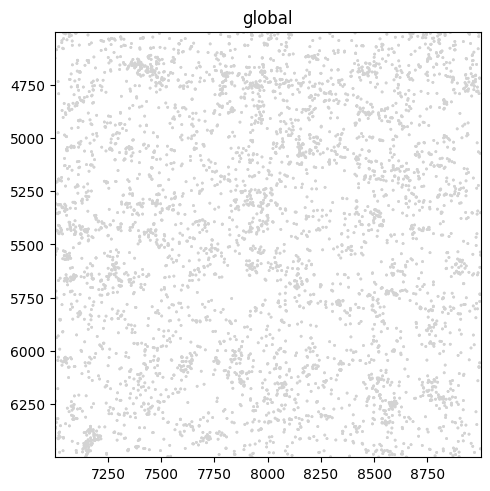

In [44]:
sdata.pl.render_points('transcripts').pl.show()

INFO     Rasterizing image for faster rendering.                                                                   
INFO     Rasterizing image for faster rendering.                                                                   


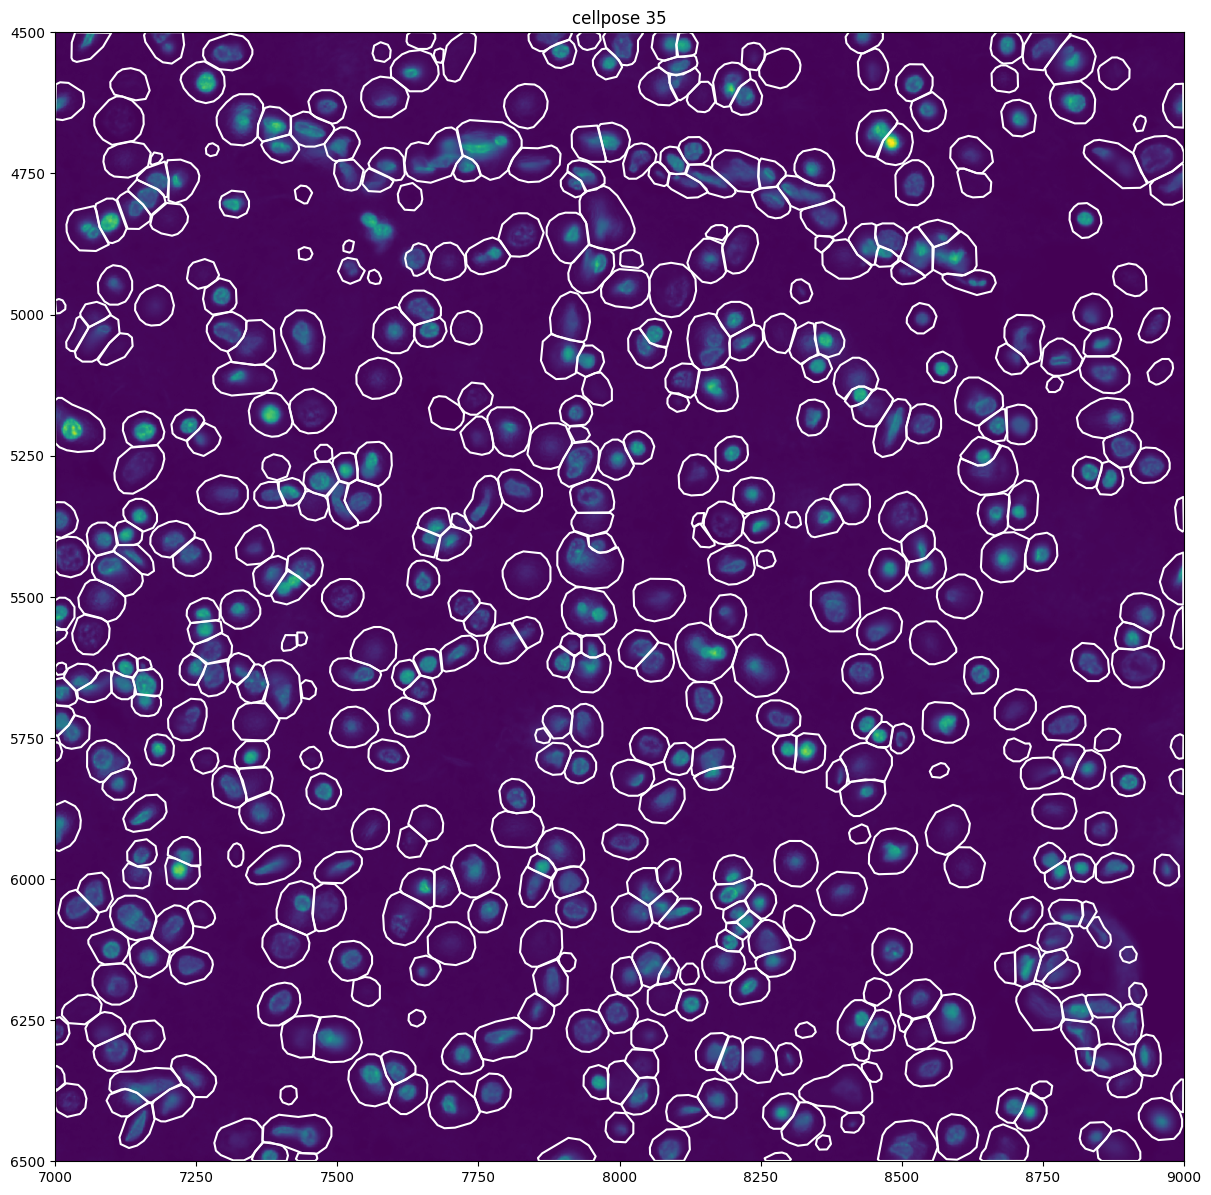

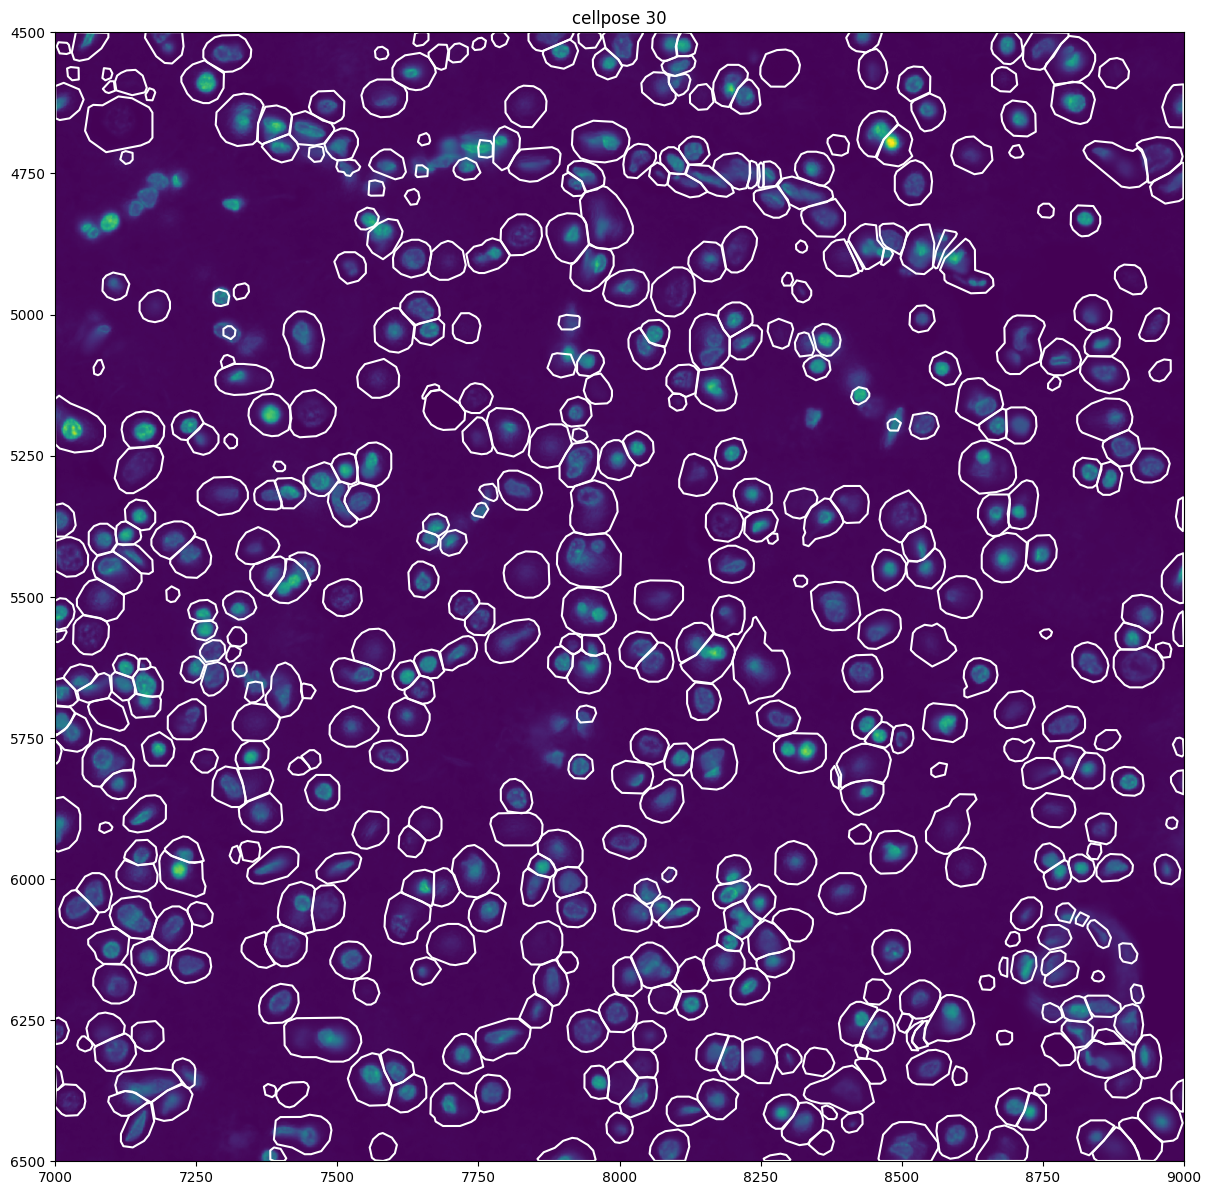

In [46]:
sdata.pl.render_images("morphology_focus", channel='DAPI').pl.render_shapes(
    "cellpose_35", fill_alpha=0, outline_color="#fff", outline_alpha=1
).pl.show("global", figsize=(12,12), frameon=False, colorbar=False, title='cellpose 35')

sdata.pl.render_images("morphology_focus", channel='DAPI').pl.render_shapes(
    "cellpose_30", fill_alpha=0, outline_color="#fff", outline_alpha=1
).pl.show("global", figsize=(12,12), frameon=False, colorbar=False, title='cellpose 30')

In [ ]:
sdata.pl.show()